In [2]:
import os
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors
from googleapiclient.discovery import build
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pylab
import warnings
import re
from textblob import TextBlob
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
%matplotlib inline

# Description of Youtube channels

For this assignment list we picked two of the most popular channels in the world which owners can be described as content creators. Fist of them is MrBeast, whose content revolves about doing different kind of challenges for money for his friends and strangers and beating unusual and weird records. The other one is Dude Perfect, where there are a couple of guys who like to have fun doing sports, create sports-related challenges and build various gadgets.
Links for channels:

MrBeast: https://www.youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA

Dude Perfect: https://www.youtube.com/channel/UCRijo3ddMTht_IHyNSNXpNQ

In [4]:
api_key = "XXX"
youtube = build('youtube','v3', developerKey = api_key)

In [5]:
def get_channel_videos(channel):
    """This function returns every single video from a given channel key
    
    PARAMETERS:
    -----------
    channel: str
    name of a youtube channel
    
    """
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics, contentDetails",
        forUsername=channel).execute()
    playlist = request['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    videos = []
    next_page_token = None
    while 1:
        res = youtube.playlistItems().list(playlistId = playlist, part ='snippet',maxResults = 50, pageToken = next_page_token).execute()
        videos += res['items']
        next_page_token = res.get('nextPageToken')
        if next_page_token is None:
            break
            
    return videos
                     

In [7]:
request_b = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        forUsername="MrBeast6000"
    )
response_beast = request_b.execute()

In [8]:
request_r = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id="UCRijo3ddMTht_IHyNSNXpNQ"
    )
response_rober = request_r.execute()

# Users Statistics

In [9]:
stats_b = response_beast['items'][0]['statistics']
df_b = pd.DataFrame.from_dict(stats_b,columns=['Statistics for MrBeast channel'],orient='index')
display(df_b)

,Statistics for MrBeast channel
viewCount,13299183162
subscriberCount,75700000
hiddenSubscriberCount,False
videoCount,714


In [10]:
stats_d = response_rober['items'][0]['statistics']
df_d = pd.DataFrame.from_dict(stats_d,columns=['Statistics for Dude Perfect channel'],orient='index')
display(df_d)

,Statistics for Dude Perfect channel
viewCount,13691856159
subscriberCount,56800000
hiddenSubscriberCount,False
videoCount,276


# Stats of a video

In [11]:
#Not every video has likeCount or other statistics ##MRBeast6000 analysis
def statistic_analysis(channel):
    """This function returns lists of statistics for a given channel 
    viewCount, likeCount, dislikeCount, commentCount and corresponding 
    video title
    
    PARAMETERS:
    -----------
    channel: str
    name of a youtube channel"""
    
    videos = get_channel_videos(channel)
    viewCount = []
    likeCount = []
    dislikeCount = []
    commentCount = []
    videoTitle = []
    
    for i in range(len(videos)-1,-1,-1):
        res = youtube.videos().list(id = videos[i]['snippet']['resourceId']['videoId'],
                               part = 'statistics').execute()
        try:
            videoTitle.append(videos[i]['snippet']['title'])
            viewCount.append(int(res['items'][0]['statistics']['viewCount']))
        except:
            pass

        try:
            likeCount.append(int(res['items'][0]['statistics']['likeCount']))
        except:
            likeCount.append(0)

        try:
            dislikeCount.append(int(res['items'][0]['statistics']['dislikeCount']))
        except:
            dislikeCount.append(0)

        try:
            commentCount.append(int(res['items'][0]['statistics']['commentCount']))
        except:
            commentCount.append(0)
    
    return viewCount, likeCount, dislikeCount, commentCount, videoTitle, videos

In [12]:
viewCountBeast, likeCountBeast, dislikeCountBeast, commentCountBeast, video_titleBeast, videosBeast = statistic_analysis("MrBeast6000")
viewCountDude, likeCountDude, dislikeCountDude, commentCountDude, video_titleDude, videosDude = statistic_analysis("corycotton")

In [13]:
def plotComparison(lista1, lista2):
    """Function returns plots for 2 lists which are showing number of particular statistics for a given
    video for different YouTube channels as well as titles of those videos
    
    PARAMETERS:
    -----------
    lista1: list
    list of values of likes, dislikes, views or comments
    
    lista2: list
    list of values of likes, dislikes, views or comments    
    """
    
    if lista1 == viewCountBeast:
        string = 'views'
        string1 = 'viewed'
    elif lista1 == likeCountBeast:
        string = 'likes'
        string1 = 'liked'
    elif lista1 == dislikeCountBeast:
        string = 'dislikes'
        string1 = 'disliked'
    else:
        string = 'comments'
        string1 = 'commented' 
        
    listaBeast = [x/1000000 for x in lista1]
    listaDude = [x/1000000 for x in lista2]
    sns.set()
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(lista1,'tab:orange', marker='o')
    ax2.plot(lista2, 'tab:red', marker='o')
    fig.set_size_inches(15, 14)
    ax1.set_title('Number of {} of particular video for MrBeast6000'.format(string), fontsize = 20, y=0.97, pad=-14)
    ax2.set_title('Number of {} of particular video for DudePerfect'.format(string), fontsize = 20, y=0.97, pad=-14)
    ax2.set_xlabel('Video number',fontsize=15)
    ax1.set_xlabel('Video number',fontsize=15)
    ax1.set_ylabel('Number of {}'.format(string),fontsize=18)
    ax2.set_ylabel('Number of {}'.format(string),fontsize=18)
    plt.show()
    
    maks1 = max(lista1)
    indeks1 = lista1.index(maks1)
    print('MrBeast most {} video is:'.format(string1), "'"+ video_titleBeast[indeks1]+"'")
    maks = max(lista2)
    indeks = lista2.index(maks)
    print('DudePerfect most {} video is:'.format(string1), "'"+ video_titleDude[indeks]+"'")

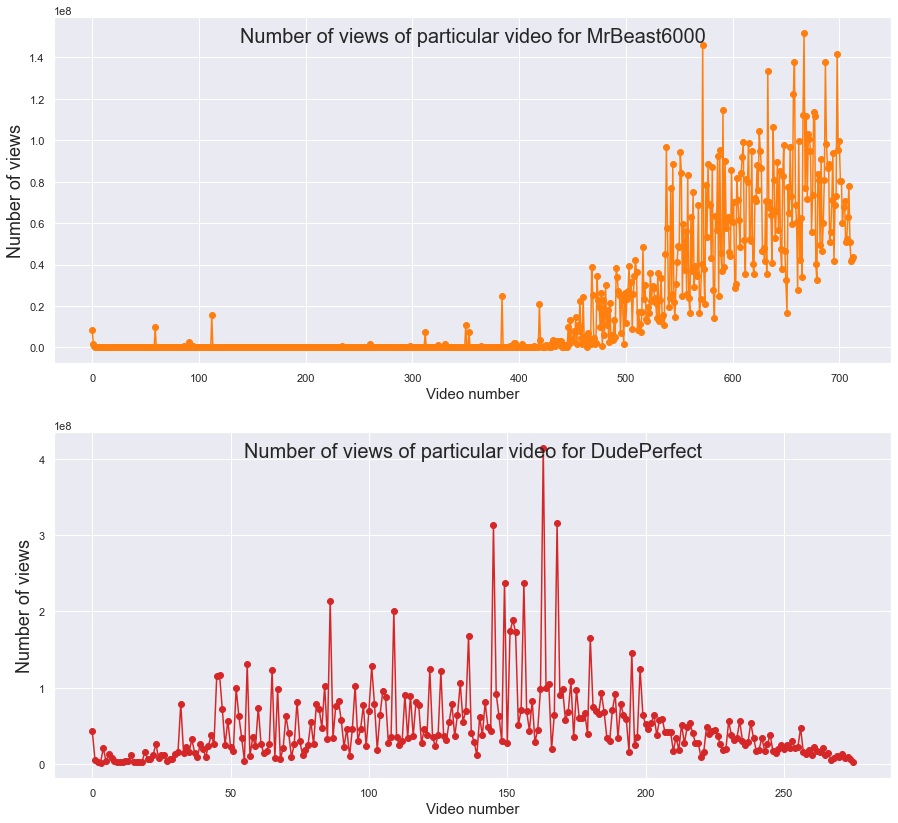

MrBeast most viewed video is: 'I Spent 50 Hours In Solitary Confinement'
DudePerfect most viewed video is: 'Water Bottle Flip 2 | Dude Perfect'


In [14]:
plotComparison(viewCountBeast,viewCountDude)

We can observe, that for a long time MrBeast had a very small number of observers, but at around his 400th video the indicators have rapidly risen up, and since then he's been having more and more vievs with it's trend going upwards. On the other hand, Dude Perfect started much better, achieving millions of views under first videos then he becam more and more popular, reching the peak between 100th and 200th video. Since then the number of videos' views have slightly declined. 

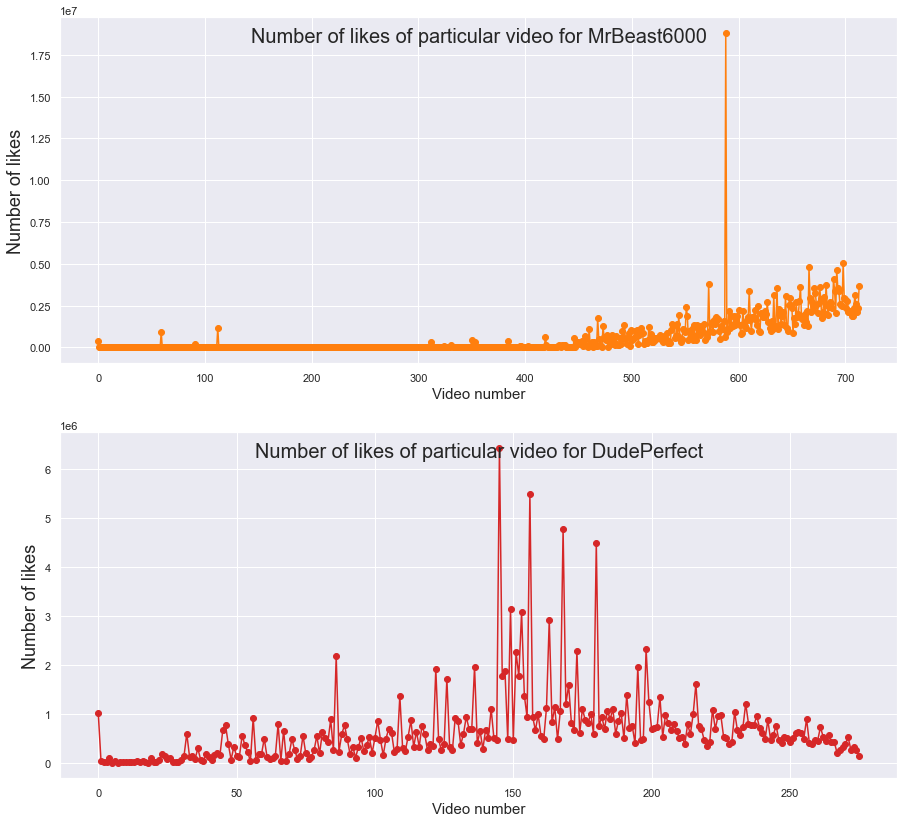

MrBeast most liked video is: 'Make This Video The Most Liked Video On Youtube'
DudePerfect most liked video is: 'Ping Pong Trick Shots 3 | Dude Perfect'


In [15]:
plotComparison(likeCountBeast,likeCountDude)

If we consider the likes under the videos of these channels, the one thing that draws the attention is the MrBeast video called "Make This Video The Most Liked Video On Youtube", where the number of likes reached an enormous number making this video the most liked video in the history of internet. Besides that we can see the trend of likes going upwards, while starting from relatively low numbers. For the Dude Perfect channel, there is a vary similar situation as with the views. They started getting more likes quickly, reaching the peak in the middle. After that they've been getting less and less likes.

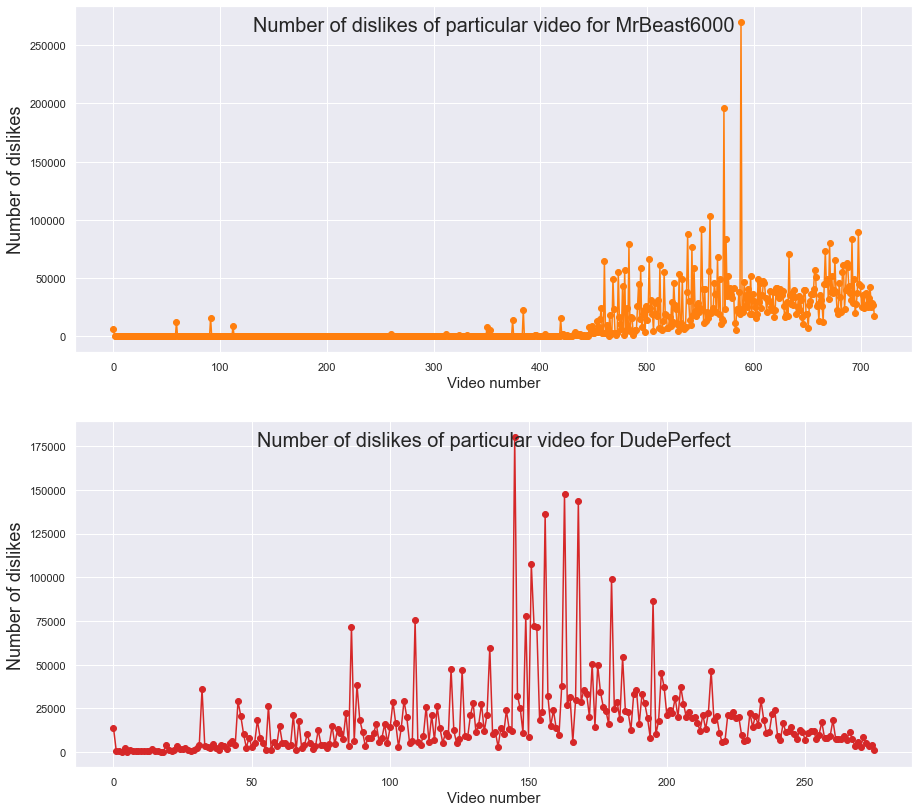

MrBeast most disliked video is: 'Make This Video The Most Liked Video On Youtube'
DudePerfect most disliked video is: 'Ping Pong Trick Shots 3 | Dude Perfect'


In [16]:
plotComparison(dislikeCountBeast,dislikeCountDude)

If we consider dislikes under the videos, they are connected to the number of likes, especially for the previously mentioned video, where the number of dislikes goes in pair with the likes. What we can also observe is the growing trend of dislikes for MrBeast as it's a result of getting more famous, and for Dude Perfect the distribution of dislikes thakes the very similar pattern as mentioned previously.

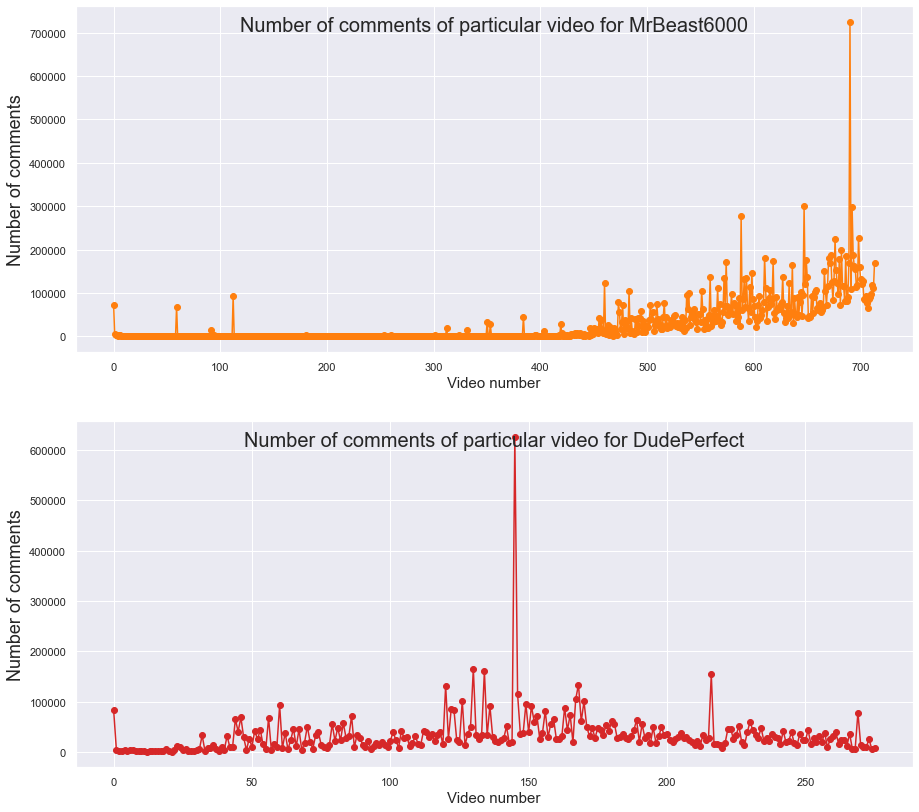

MrBeast most commented video is: 'I Opened A Restaurant That Pays You To Eat At It'
DudePerfect most commented video is: 'Ping Pong Trick Shots 3 | Dude Perfect'


In [17]:
plotComparison(commentCountBeast, commentCountDude)

What's interesting in the count of comments under the videos is that one video of each of the channels has a particularly high number of responses. It might be caused by the unusual evens that happened in the videos that had an impact on the viewer's reaction. Besides that, we observe very similar trends on the other charts.

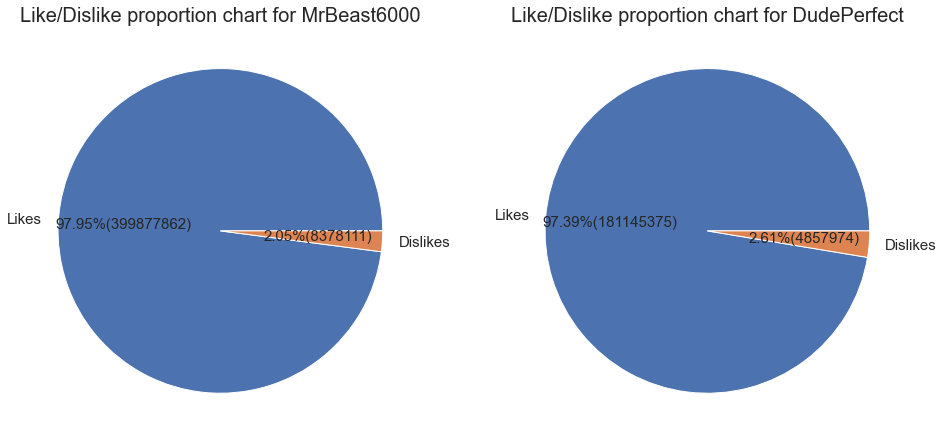

In [18]:
likes_dislikes_listBeast = [sum(likeCountBeast),sum(dislikeCountBeast)]
likes_dislikes_listDude = [sum(likeCountDude),sum(dislikeCountDude)]
lbls = ['Likes', 'Dislikes']
dfBeast = pd.DataFrame(likes_dislikes_listBeast,index = ['Likes', 'Dislikes'],columns = ['Count'])
dfDude = pd.DataFrame(likes_dislikes_listDude,index = ['Likes', 'Dislikes'],columns = ['Count'])

plt.figure()
plt.subplot(121)
valuesBeast = dfBeast['Count']
valuesBeast.plot(kind='pie',labels = lbls, fontsize = 15, figsize=[10,10],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*valuesBeast.sum()))
pylab.ylabel('')
plt.title('Like/Dislike proportion chart for MrBeast6000', fontsize=20)

plt.subplot(122)
valuesDude = dfDude['Count']
valuesDude.plot(kind='pie',labels = lbls, fontsize = 15, figsize=[10,10],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*valuesDude.sum()))
pylab.ylabel('')
plt.title('Like/Dislike proportion chart for DudePerfect', fontsize=20)
plt.gcf().set_size_inches(16, 10)
plt.show()

Next up, we can summarise the likes and dislikes and compare the proportion between them for both channels. It seems that the ratio is similar for them, at around 97% with the slight advantage for MrBeast.

In [19]:
def boxplot_and_density_comparison(number):
    """This function returns 2 boxplots which show likes, dislikes, comments or views
    depending of what we choose
    
    PARAMETERS:
    -----------
    number: int
    Depending on what number from 1-4 we choose, boxplots for different quantities will be drawn"""
    
    df_beast = pd.DataFrame(list(zip(video_titleBeast,viewCountBeast,likeCountBeast,dislikeCountBeast,commentCountBeast)),
                        columns = ['videotitle','viewCount','likeCount','dislikeCount','commentCount'] )
    df_dude = pd.DataFrame(list(zip(video_titleDude,viewCountDude,likeCountDude,dislikeCountDude,commentCountDude)),
                        columns = ['videotitle','viewCount','likeCount','dislikeCount','commentCount'] )
    
    if number == 1:
        string = 'Views'
        string2 = 'viewCount'
    elif number == 2:
        string = 'Likes'
        string2 = 'likeCount'
    elif number == 3:
        string = 'Dislikes'
        string2 = 'dislikeCount'
    else:
        string ='Comments'
        string2 = 'commentCount'
        
    plt.figure
    plt.subplot(121)
    plt.boxplot(df_beast[string2])
    plt.gcf().set_size_inches(16, 10)
    plt.ylabel('{}'.format(string))
    plt.title('MrBeast6000',fontsize = 20)

    plt.subplot(122)
    plt.boxplot(df_dude[string2])
    plt.gcf().set_size_inches(16, 10)
    plt.title('DudePerfect',fontsize = 20)
    plt.ylabel('{}'.format(string))
    plt.show()
    
    plt.figure()
    plt.subplot(211)
    g = sns.distplot(df_beast[string2])
    plt.title('Histogram and density of numbers of {} of all videos for MrBeast6000'.format(string))
    plt.gcf().set_size_inches(16, 12)
    
    plt.subplot(212)
    g = sns.distplot(df_dude[string2])
    plt.title('Histogram and density of numbers of {} of all videos for DudePerfect'.format(string))
    plt.gcf().set_size_inches(16, 12)
    plt.show()

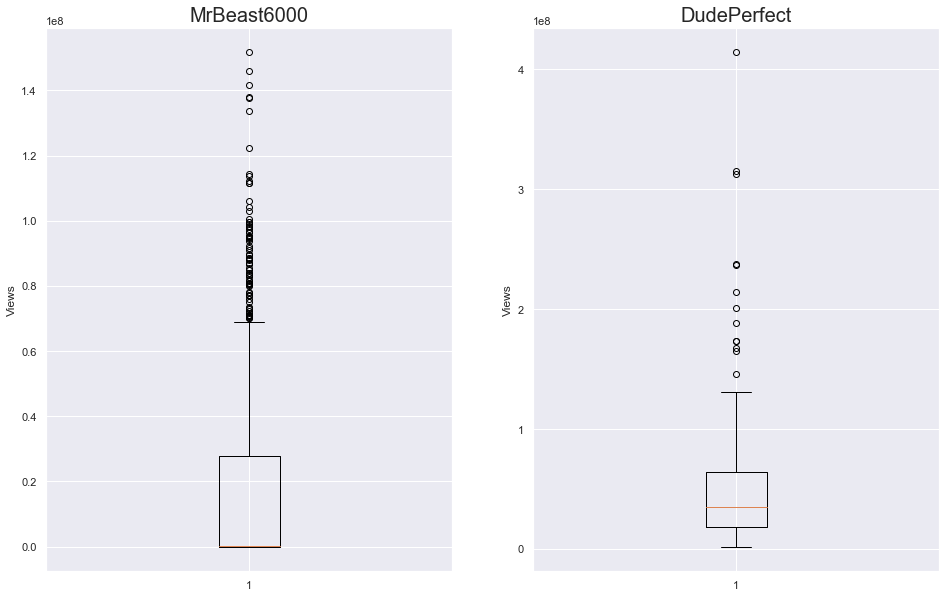

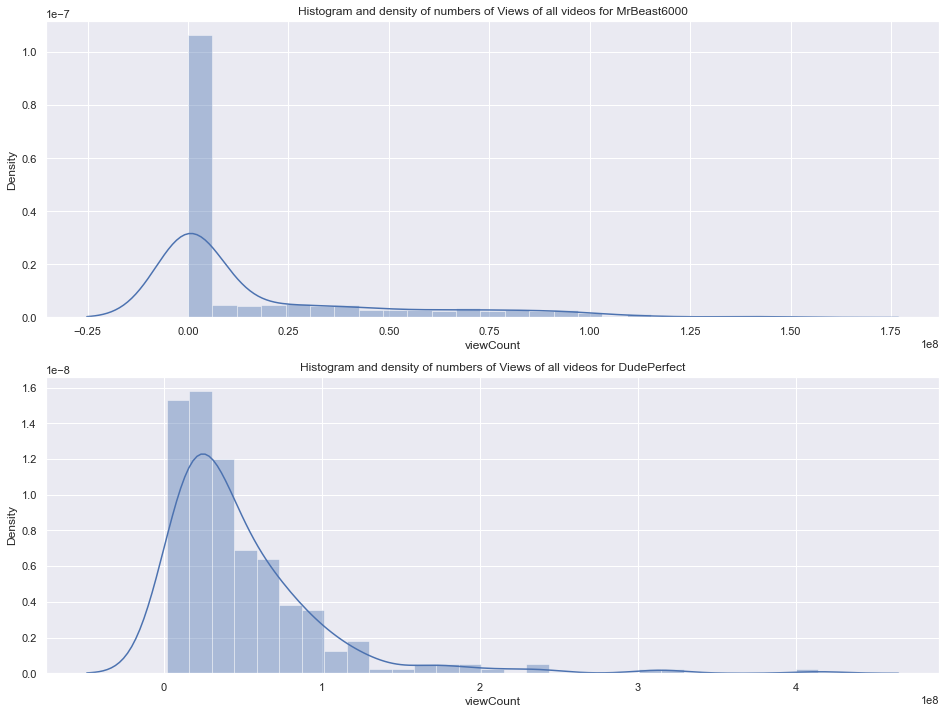

In [20]:
boxplot_and_density_comparison(1)

Now, we can check the statistics for the channels' video views. MrBeast had a lot of videos with a few views and as he became more known he gained much more vievers, his views average isn't high and there are many outliers which indicated the newer, more popular content. For Dude Perfect channel the situation is much smoother, where the average views of their videos is higher with not so many values standing out. 

This dependence is also shown on the histogram/density plot, where the majority of views for MrBeast is a low number, but there are also many videos with a big number of views. The situation for Dude Perfect is slighly different, where the major part of his videos has a number of views up to 100 000 000, but a bigger part of then has exceeded the level of ~15mln.

# Selected Videos Sentimental Analysis

In this part we picked videos for both channels concerning the tick shots in sports and other unusual shots that draw the attention of viewer. We wanted to compare the statistics and most importantly the comments in the videos to find out whose tricks were better or made the public more surprised and hyped.

In [21]:
indeks_b = video_titleBeast.index('We Are Better Than Dude Perfect')
viewBeast_vid = viewCountBeast[indeks_b]
likeBeast_vid = likeCountBeast[indeks_b]
dislikeBeast_vid  = dislikeCountBeast[indeks_b]
commentBeast_vid  = commentCountBeast[indeks_b]


indeks_d = video_titleDude.index('All Sports Trick Shots | Dude Perfect')
viewDude_vid = viewCountDude[indeks_d]
likeDude_vid = likeCountDude[indeks_d]
dislikeDude_vid  = dislikeCountDude[indeks_d]
commentDude_vid  = commentCountDude[indeks_d]

dct = {'views':[viewBeast_vid, viewDude_vid], 'likes' : [likeBeast_vid, likeDude_vid],
       'dislikes' : [dislikeBeast_vid, dislikeDude_vid], 'number of comments' : [commentBeast_vid, commentDude_vid]}
df_vid = pd.DataFrame.from_dict(dct)
df_vid.index = ['MrBeast', 'Dude Perfect']
df_vid

,views,likes,dislikes,number of comments
MrBeast,22681023,574429,56832,38061
Dude Perfect,27135047,593082,13214,23626


In [22]:
def get_video_comments(videoID):
    """
    Function retrieves comments fro mthe given ID of the video and returns them
    
    Arguments:
    videoID - YouTube video id as a string
    """
    comments = []
    results = youtube.commentThreads().list(part="snippet",    
                                            videoId=videoID,
                                            textFormat="plainText").execute()
    while True:
        for item in results['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
        if 'nextPageToken' in results:
            results = youtube.commentThreads().list(part="snippet",    
                                            videoId=videoID,
                                            textFormat="plainText",
                                            pageToken = results['nextPageToken']).execute()
        else:
            break
    return comments

In [ ]:
koment_beast = get_video_comments('Lx9fRu5ehFo')

In [ ]:
koment_dude = get_video_comments('bIDKhZ_4jLQ')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
stopwords = nltk.corpus.stopwords.words("english")
# getting rid of the unnecessary words like: "so", "I", "be", "for", "and", etc.
sia = SentimentIntensityAnalyzer()

In [ ]:
#getting the frequency of the words that appear in the comments
words_b = []
for i in koment_beast:
    res = i.split()
    for k in res:
        words_b.append(k)
words_new_b = [w for w in words_b if w.lower() not in stopwords]
frequency_b = nltk.FreqDist(words_new_b)
df_freqb = pd.DataFrame(frequency_b.items())
df_freqb.columns = ['Mr Beast words', 'frequency']
df_freqb.sort_values(by = 'frequency', ascending = False, inplace=True)


words_d = []
for i in koment_dude:
    res = i.split()
    for k in res:
        words_d.append(k)
words_new_d = [w for w in words_d if w.lower() not in stopwords]
frequency_d = nltk.FreqDist(words_new_d)
df_freqd = pd.DataFrame(frequency_d.items())
df_freqd.columns = ['Dude Perfect words', 'frequency']
df_freqd.sort_values(by = 'frequency', ascending = False, inplace=True)


In [ ]:
df_freqb.head(10)

In [ ]:
df_freqd.head(10)

For the content of comments under the Mr Beast video we can observe many references to the Dude Perfect channel, as they are the precursors in this area, whereas in the other video there are more comments refering to the actual shots made and whether the viewers liked them.

In [ ]:
#Dividing comments into polarization categories 
negative_b = []
positive_b = []
neutral_b = []
negative_comment_b = []
positive_comment_b = []
neutral_comment_b = []
for com in koment_beast:
    sentiment = sia.polarity_scores(com) 
    negative_b.append(sentiment['neg'])
    positive_b.append(sentiment['pos'])
    neutral_b.append(sentiment['neu'])
    if sentiment['neg']>0:
        negative_comment_b.append(com)
    if sentiment['pos']>0:
        positive_comment_b.append(com)
    if sentiment['neu']>0:
        neutral_comment_b.append(com)


In [25]:
negative_d = []
positive_d = []
neutral_d = []
negative_comment_d = []
positive_comment_d = []
neutral_comment_d = []
for com in koment_dude:
    sentiment = sia.polarity_scores(com) 
    negative_d.append(sentiment['neg'])
    positive_d.append(sentiment['pos'])
    neutral_d.append(sentiment['neu'])
    if sentiment['neg']>0:
        negative_comment_d.append(com)
    if sentiment['pos']>0:
        positive_comment_d.append(com)
    if sentiment['neu']>0:
        neutral_comment_d.append(com)

In [148]:
negative_words_b = []
for i in negative_comment_b:
    res_n = i.split()
    for k in res_n:
        negative_words_b.append(k)
words_neg_b = [w for w in negative_words_b if w.lower() not in stopwords]
frequency_neg_b = nltk.FreqDist(words_neg_b)
df_freqnegb = pd.DataFrame(frequency_neg_b.items())
df_freqnegb.columns = ['Mr Beast words in negative comments', 'frequency']
df_freqnegb.sort_values(by = 'frequency', ascending = False, inplace=True)


negative_words_d = []
for i in negative_comment_d:
    res_n = i.split()
    for k in res_n:
        negative_words_d.append(k)
words_neg_d = [w for w in negative_words_d if w.lower() not in stopwords]
frequency_neg_d = nltk.FreqDist(words_neg_d)
df_freqnegd = pd.DataFrame(frequency_neg_d.items())
df_freqnegd.columns = ['Dude Perfect words in negative comments', 'frequency']
df_freqnegd.sort_values(by = 'frequency', ascending = False, inplace=True)

In [149]:
df_freqnegb.head(10)

,Mr Beast words in negative comments,frequency
7,perfect,1478
9,dude,1382
63,better,1245
30,guys,710
62,suck,531
29,u,434
128,Dude,428
52,shot,244
141,shots,242
239,one,214


In [141]:
df_freqnegd.head(10)

,Dude Perfect words in negative comments,frequency
4,trick,1680
69,shots,849
5,shot,687
451,cricket,439
112,video,398
162,guys,342
51,like,308
419,one,281
29,volleyball,267
1616,?,257


If we take a look at the words from the comments that were indicated to be negative we can find out that under MrBeast video there might be references that guys from Dude Perfect did it better or the quality of content wasn't good enough. For the Dude Perfect video, there aren't words that would directly indicate what viewers did't like and what made them write a negative comments.

In [146]:
positive_words_b = []
for i in positive_comment_b:
    res_p = i.split()
    for k in res_p:
        positive_words_b.append(k)
words_pos_b = [w for w in positive_words_b if w.lower() not in stopwords]
frequency_pos_b = nltk.FreqDist(words_pos_b)
df_freqposb = pd.DataFrame(frequency_pos_b.items())
df_freqposb.columns = ['Mr Beast words in positive comments', 'frequency']
df_freqposb.sort_values(by = 'frequency', ascending = False, inplace=True)

positive_words_d = []
for i in positive_comment_d:
    res_p = i.split()
    for k in res_p:
        positive_words_d.append(k)
words_pos_d = [w for w in positive_words_d if w.lower() not in stopwords]
frequency_pos_d = nltk.FreqDist(words_pos_d)
df_freqposd = pd.DataFrame(frequency_pos_d.items())
df_freqposd.columns = ['Dude Perfect words in positive comments', 'frequency']
df_freqposd.sort_values(by = 'frequency', ascending = False, inplace=True)

In [147]:
df_freqposb.head(10)

,Mr Beast words in positive comments,frequency
19,perfect,3710
16,dude,2750
15,better,2735
30,Dude,1749
74,guys,666
45,Perfect,569
73,u,498
40,good,410
50,lol,394
133,way,340


In [144]:
df_freqposd.head(10)

,Dude Perfect words in positive comments,frequency
50,like,916
22,love,734
133,perfect,706
4,trick,688
149,video,560
20,guys,546
132,dude,524
226,Dude,460
5,shot,402
100,cricket,397


For the positive comments thta were posted on MrBeast video we can see that many people might incitace that his shots are indeed better and the accompanying emotions are also favorable. In the Dude Perfect's video there also are many words indicating that viewers liked the content and are under impression of the tricky shots 

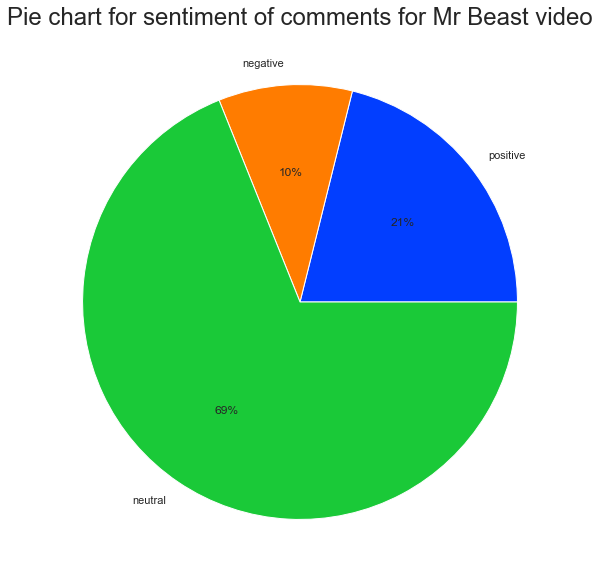

In [32]:
plt.figure()
sentiment_result_b = [np.sum(positive_b), np.sum(negative_b), np.sum(neutral_b)]
labels = ['positive', 'negative', 'neutral']

colors = sns.color_palette('bright')[0:3]
plt.gcf().set_size_inches(16, 10)
plt.pie(sentiment_result_b, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pie chart for sentiment of comments for Mr Beast video", fontsize=24)
plt.show()

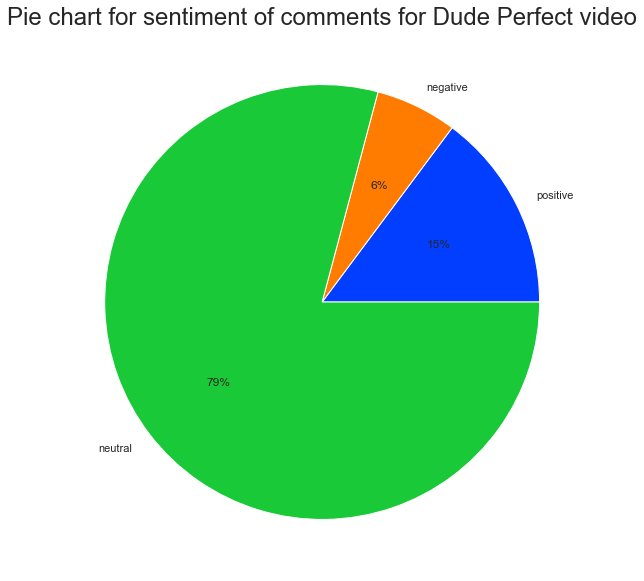

In [33]:
plt.figure()
sentiment_result_d = [np.sum(positive_d), np.sum(negative_d), np.sum(neutral_d)]
labels = ['positive', 'negative', 'neutral']

colors = sns.color_palette('bright')[0:3]
plt.gcf().set_size_inches(16, 10)
plt.pie(sentiment_result_d, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pie chart for sentiment of comments for Dude Perfect video", fontsize=24)
plt.show()

As we see the pie charts for the categories of the comments, the video that made viewers more emotional was made by MrBeast, as only 69% of his comments were neutral, but the ratio of positive to negative comments is better for the Dude Perfect video, as for one negative comment there are about 2.5 positive comments, whereas for Mr Beast this ratio is closer to 2.

# The polarity and subjectivity of the comments

In [34]:
def text_merge(comments):
    """
    Function that merges the list comments into one big string and returns it
    
    Arguments:
    comments - list of single comments 
    """
    raw_text = ' '.join(comments)
    return raw_text

In [35]:
def ClearText(text):
    """
    Function that clears the text removing unnecessary signs, mentions, hyperlinks and brackes, returns the cleared text
    
    Arguments:
    text to be cleared
    """
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removing @mentions
    text = re.sub(r'#', '', text) #Removing '#' sign
    text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyperlink
    text = re.sub(r'[\([{})\]]', '', text) #Removing brackets
    
    return text

In [36]:
def get_polarity(text):
    """
    Function retrieves and returns the polarity of a text
    """
    return TextBlob(text).sentiment.polarity

In [37]:
def get_subjectivity(text):
    """
    Function retrieves and returns the subjectivity of a text
    """
    return TextBlob(text).sentiment.subjectivity

In [38]:
def wordCloud(text):
    """
    Function creates a wordcloud for a given text - the words that are more frequent are bigger
    """
    raw_text = text_merge(text)
    cleared_text = ClearText(raw_text)
    wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(cleared_text)
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.gcf().set_size_inches(16, 12)
    plt.show()

In [145]:
def informational_df(comments):
    """
    Function creates an informational data frame with the polarity and subjectivity of a given comments and returns it
    """
    df = pd.DataFrame(comments, columns = ['Comment'])
    df['Comment'] = df['Comment'].apply(ClearText)
    df['Polarity'] = df['Comment'].apply(get_polarity)
    df['Subjectivity'] = df['Comment'].apply(get_subjectivity)
    return df

In [40]:
def plot_subjectivity_polarity(comments):
    """
    Function that plots the chart of subjectivity vs the polarity of the list of comments
    """
    DataFrame = informational_df(comments)
    plt.figure()
    for i in range(0, DataFrame.shape[0]):
        plt.scatter(DataFrame['Polarity'][i], DataFrame['Subjectivity'][i], color = 'Blue')
    plt.title('Sentiment Analysis', fontsize=25)
    plt.xlabel('Polarity', fontsize=21)
    plt.ylabel('Subjectivity', fontsize=21)
    plt.xlim(-1,1)
    plt.gcf().set_size_inches(16, 12)
    plt.show()

### MrBeast

In [41]:
merged_text = text_merge(koment_beast)
print("Polarity without cleaning data = ", get_polarity(merged_text))
print("Subjectivity without cleaning data = ", get_subjectivity(merged_text))
clean_data = ClearText(merged_text)
print("Polarity after data cleaning = ", get_polarity(clean_data))
print("Subjectivity after data cleaning = ", get_subjectivity(clean_data))

Polarity without cleaning data =  0.3913430335404686
Subjectivity without cleaning data =  0.6454581570544645
Polarity after data cleaning =  0.3931405119799652
Subjectivity after data cleaning =  0.6435491719718656


We can see that the clearing of the data slightly increased the level of polarity and decreased the level of subjectivity.

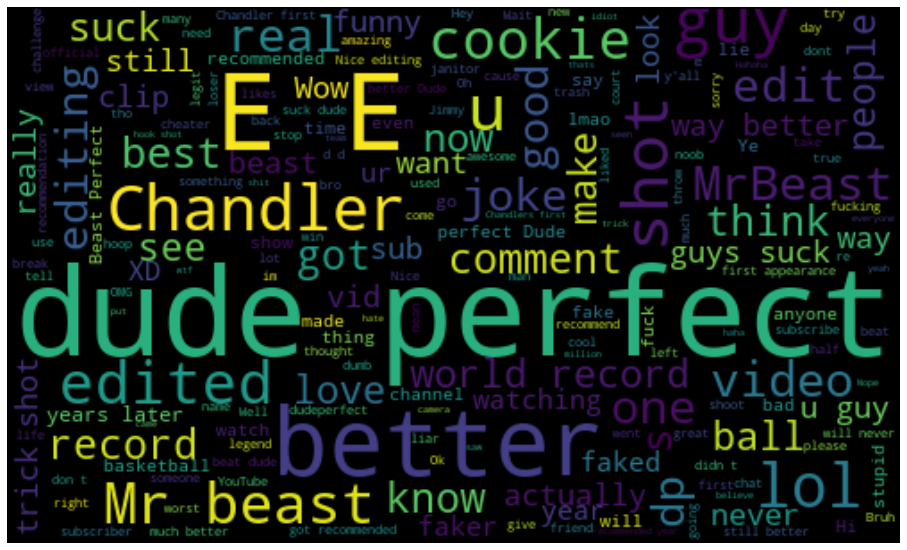

In [42]:
wordCloud(koment_beast)

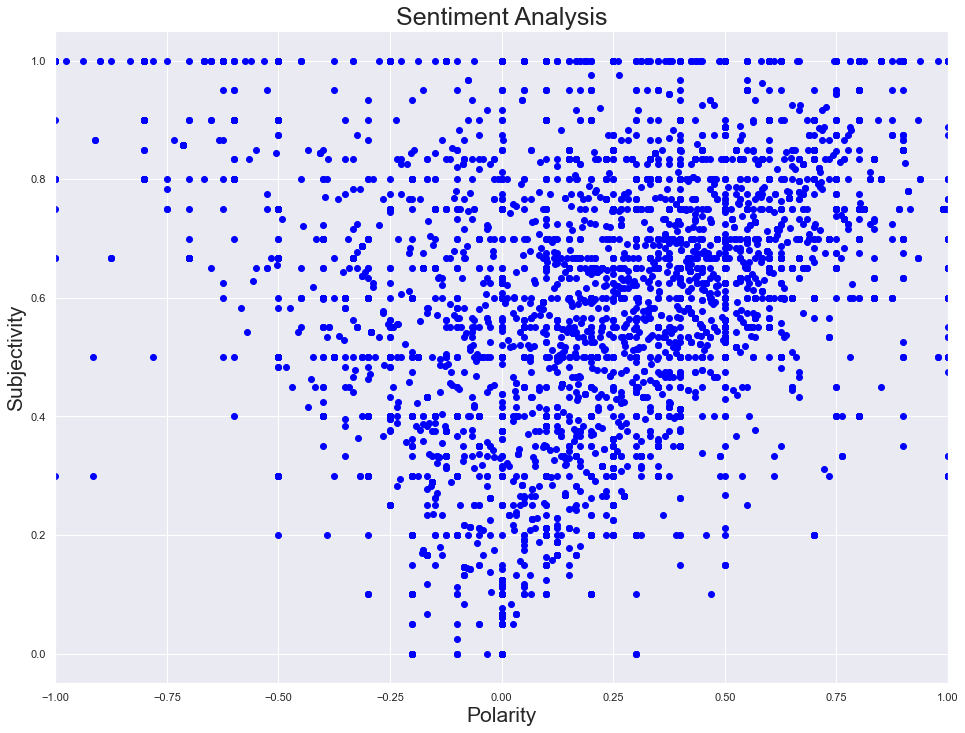

In [43]:
plot_subjectivity_polarity(koment_beast)

For the graph of Subjectivity vs Polarity of the comments under the video of MrBeast we can observe that most of the values are arranged in the shape of a cone with the advantege of comments of the positive polarity. There are many comments for which both parameters are high and there are very few for which this proportion is reversed (low polarity and subjectivity).

### DudePerfect

In [44]:
merged_text = text_merge(koment_dude)
print("Polarity without cleaning data = ", get_polarity(merged_text))
print("Subjectivity without cleaning data = ", get_subjectivity(merged_text))
clean_data = ClearText(merged_text)
print("Polarity after data cleaning = ", get_polarity(clean_data))
print("Subjectivity after data cleaning = ", get_subjectivity(clean_data))

Polarity without cleaning data =  0.28472293959373024
Subjectivity without cleaning data =  0.5810478956792586
Polarity after data cleaning =  0.28774826746287935
Subjectivity after data cleaning =  0.575667254386427


Here, the situation is similar, the clearing of the data caused an increase in polarity and decrease in subjectivity.

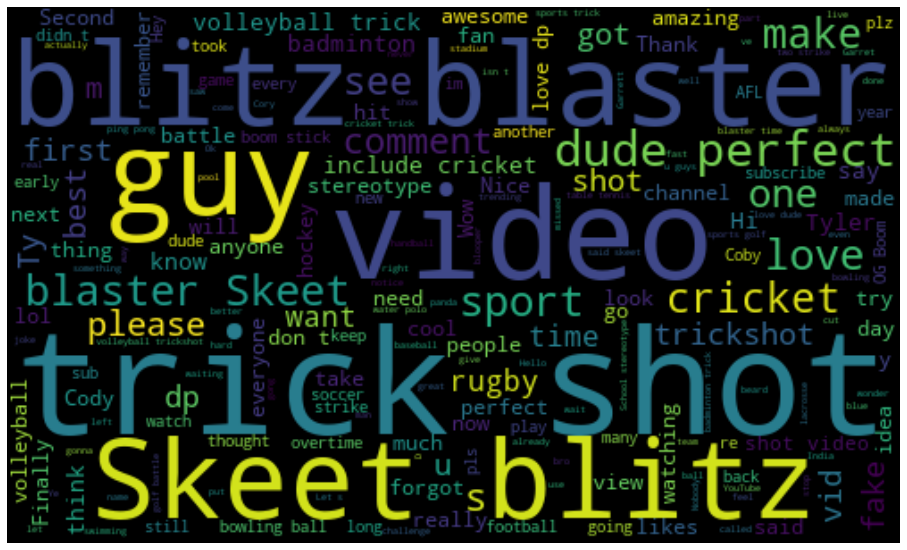

In [45]:
wordCloud(koment_dude)

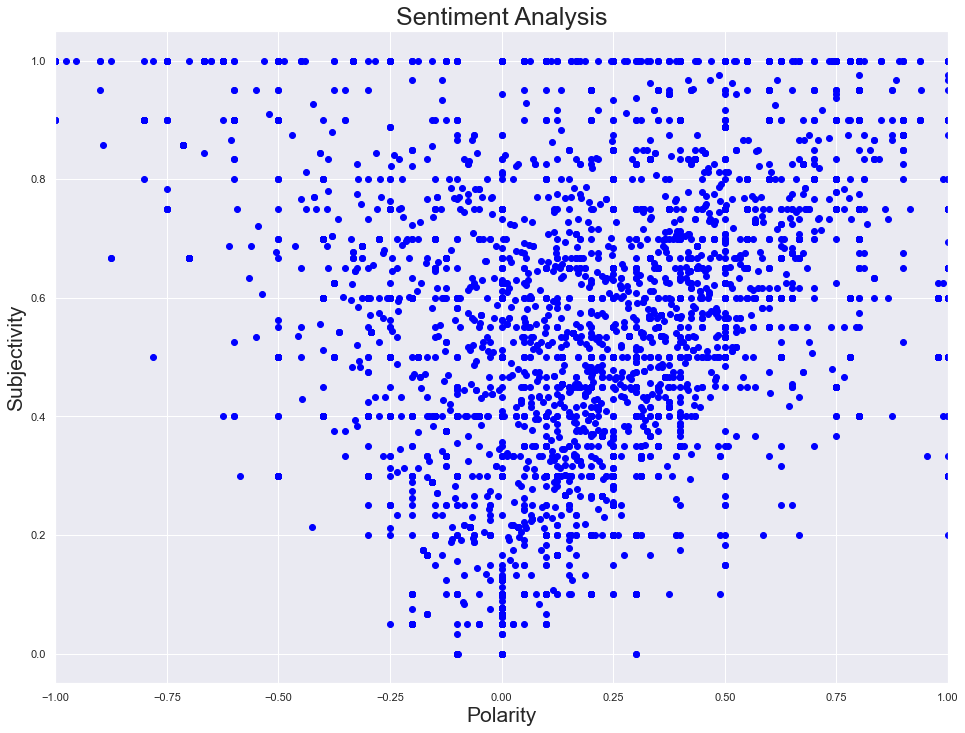

In [46]:
plot_subjectivity_polarity(koment_dude)

The situation for the Dude Perfect comments is also very similar for the sentiment analysis graph. Most of the comments' ploarity is positive and the subjectivity of the comments is relatively high.

# Conclusions

1. The analyzed channels are in top 10 biggest channels on the YouTube, each having over 50 M. subscribers and 13 B. total video views,
2. The total number of views for videos of each channel is almost the same, but MrBeast has three times more videos published, meaning that the average number of views for a single video is higher for Dude Perfect despite having less subscribers,
3. The first videos of MrBeast weren't really popular while the videos of Dude perfect became famous from the very beginning,
4. MrBeast manipulated the statistics of the video likes encouraging his viewers to like his published film by naming it to be "the most liked video on YouTube", what affected our results,
5. The ratio between the likes and dislikes under the films for both channels is strictly higher than the ratio of positive to negative comments, but it's still favorable for the positive ones,
6. Both the chosen videos revolver around the topic of trick shots, had a similar amount of views, but the video of MrBeast generated more dislikes and comments, what could be caused by comparing themselves to the other channel,
7. By sentimental analysis of the comments under both of the videos we can deduce that majority of the comments are of a positive polarity and are subjective what means that the public and fans of these both channels have positive attitude towards the channels' content, 